##Installs and import


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install preprocessor

  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4477 sha256=f11d04d78a83b3879f48229855f851d353441b7c4d2e3844552d748aed1fdced
  Stored in directory: /root/.cache/pip/wheels/0e/b7/36/aa37256db62b4bfd35a6f1b5536e9ba843f257b79dcbf3d5f1
Successfully built preprocessor


##dataset loading and shuffling


In [2]:
import pandas as pd
import numpy as np # linear algebra
import sklearn

In [ ]:
df_attacking = pd.read_csv("/content/drive/MyDrive/323 final/Online dataset/attacking.csv")
#df_misogyny=pd.read_csv("/content/drive/MyDrive/323 final/Online dataset/misogyny.csv")
#df_offensive=pd.read_csv("/content/drive/MyDrive/323 final/Online dataset/offensive.csv")
#df_racism=pd.read_csv("/content/drive/MyDrive/323 final/Online dataset/racism.csv")

In [ ]:
df_augmented=pd.read_csv("/content/drive/MyDrive/323 final/Online dataset/agumented01.csv")

In [ ]:
#df_all=pd.concat([df_attacking,df_misogyny,df_offensive,df_racism],ignore_index=True)

In [ ]:
df_attacking=df_attacking[["Text","class"]]

In [ ]:
df_all=pd.concat([df_augmented,df_attacking],ignore_index=True)

In [ ]:
df_all.to_csv("concatenated.csv")

In [ ]:
df_all.head()

,Text,class
0,":I'm retired, fuckers. Leave me alone.",0
1,` == Deletion of created pages == You have d...,0
2,:::HAPPY XMAS I HOPE SANTA GIVES YOU A JAIL ...,0
3,"I hit a jack off all day, after the rape my...",0
4,"I am not here to be constructive, I am here ...",0


In [ ]:
df_all=df_all[["Text","class"]]


In [ ]:
df_all.head()

,Text,class
0,":I'm retired, fuckers. Leave me alone.",0
1,` == Deletion of created pages == You have d...,0
2,:::HAPPY XMAS I HOPE SANTA GIVES YOU A JAIL ...,0
3,"I hit a jack off all day, after the rape my...",0
4,"I am not here to be constructive, I am here ...",0


In [ ]:
df_all.reset_index(inplace=True)

In [ ]:
df_all["class"].value_counts()

0    233596
4    218814
3    218814
1    218814
2    101082
Name: class, dtype: int64

In [ ]:
df_all = df_all.dropna()
df_all = df_all.drop_duplicates()

In [ ]:
df_all['class_names']=df_all.class_names.replace(' offensive','offensive')
df_all['class_names']=df_all.class_names.replace(' neutral','neutral')

AttributeError: ignored

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df_all.class_names)
df_all['class'] = le.transform(df_all.class_names)

AttributeError: ignored

In [ ]:
df_all["class"].value_counts()

0    233596
4    218814
3    218814
1    218814
2    101082
Name: class, dtype: int64

In [ ]:
import random

index = [i for i in range(df_all.shape[0])]
random.shuffle(index)
df_all=df_all.set_index([index]).sort_index()

In [ ]:
import sklearn
df_all=sklearn.utils.shuffle(df_all)
print(df_all)

         index                                               Text  class
541109  922383  `  == Come on ==  I'm just saying imagine you ...      2
570838  512578   .@SlutWalkTO @Filotto @TheGags29 @bowtie_guy1...      1
144202  589433   Yes, we get it. You're pretty. Tone down the ...      1
94492   342601   You cant block me you fucking retard. BRB nigger      3
971946  845084   RT @RudawEnglish: #ISIS has begun recruiting ...      4
...        ...                                                ...    ...
114625  569464   Oh Shit. Now we have to put up with freaking ...      1
197016    3846   :What's your concept for uncivic?? you are on...      0
574800  557289   RT @VSVPDeezyy_ Not sexist but there are cert...      1
416746  178015   ` Yes, I also wondered where this guy came fr...      0
965397  111634   Please stop vandalising the Gary Williams pag...      0

[991120 rows x 3 columns]


In [ ]:
df_all.head(n=50)

In [ ]:
df_all.reset_index(inplace=True)


In [ ]:
#df_all=df_all.head(n=200000)

##preprocessing


Contraction expansion

In [ ]:
!pip install contractions

     |████████████████████████████████| 284 kB 4.2 MB/s 
     |████████████████████████████████| 321 kB 35.7 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85447 sha256=c6d58f1b05da77afa64ddd47806d3f89d5dd826a2b66412171802d3a76cabbfb
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
import contractions as c

In [ ]:
def contraction_expand_tweet(row):
    text = row['Text']
    text = c.fix(text)
    return text

In [ ]:
df_all=df_all[["Text","class"]]



In [ ]:
df_all['Text'] = df_all.apply(contraction_expand_tweet, axis=1)

Cleaning

In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p
import numpy as np 
import pandas as pd 

In [ ]:
def preprocess_tweet(row):
    text = row['Text']
    text = p.clean(text)
    return text

In [ ]:
df_all['Text'] = df_all.apply(preprocess_tweet, axis=1)

In [ ]:
df_all.head()

,Text,class
0,` == Come on == I am just saying imagine you a...,2
1,. You support the slut shaming of ? Odd...,1
2,"Yes, we get it. you are pretty. Tone down the ...",1
3,You cannot block me you fucking retard. BRB ni...,3
4,RT : has begun recruiting Moroccan prostitutes...,4


Clearing html marks (&amp)

In [ ]:
from bs4 import BeautifulSoup


In [ ]:
def html_char_removal(row):
    text = row['Text']
    text = BeautifulSoup(text).get_text()

    return text

In [ ]:
df_all['Text'] = df_all.apply(html_char_removal, axis=1)

In [ ]:
df_all.head()

,Text,class
0,` == Come on == I am just saying imagine you a...,2
1,. You support the slut shaming of ? Odd...,1
2,"Yes, we get it. you are pretty. Tone down the ...",1
3,You cannot block me you fucking retard. BRB ni...,3
4,RT : has begun recruiting Moroccan prostitutes...,4


Extracting English Tweets

In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 3.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=b927172f70e76403a8a3ee56235b2a0da4d8172e9f750fcfbbabc4135f7ac02c
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from langdetect import detect

def detect_lang(txt):
  try:
    return detect(txt)
  except:
    return np.nan

text="Bonsoir"
detect_lang(text)

#data["language"] = data.cleaned_text.apply(detect_lang)

'fr'

In [ ]:
df_all["text"]=df_all.Text.apply(detect_lang)

In [ ]:
new_data = df_all[df_all.text == "en"]
#new_data.reset_index()


In [ ]:
new_data.head()

,Text,class,text
0,` == Come on == I am just saying imagine you a...,2,en
1,. You support the slut shaming of ? Odd...,1,en
2,"Yes, we get it. you are pretty. Tone down the ...",1,en
3,You cannot block me you fucking retard. BRB ni...,3,en
4,RT : has begun recruiting Moroccan prostitutes...,4,en


In [ ]:
#new_data=new_data[["Text" ,	"class_names" ,	"class" ,	"text"]]
new_data=new_data[["Text" ,	"class" ,	"text"]]

In [ ]:
new_data.reset_index(inplace=True)

In [ ]:
df_all=new_data

In [ ]:
df_all.head()

,index,Text,class,text
0,0,` == Come on == I am just saying imagine you a...,2,en
1,1,. You support the slut shaming of ? Odd...,1,en
2,2,"Yes, we get it. you are pretty. Tone down the ...",1,en
3,3,You cannot block me you fucking retard. BRB ni...,3,en
4,4,RT : has begun recruiting Moroccan prostitutes...,4,en


In [ ]:
df_all["class"].value_counts()

4    217621
0    217441
1    208005
3    202825
2     98591
Name: class, dtype: int64

In [ ]:
df_all.count()

index    944483
Text     944483
class    944483
text     944483
dtype: int64

Stopward removal

In [ ]:
!pip install gensim

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
def stopword_removal(row):
    text = row['Text']
    text = remove_stopwords(text)
    return text

In [ ]:
df_all['Text'] = df_all.apply(stopword_removal, axis=1)

In [ ]:
df_all['Text'] = df_all['Text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

In [ ]:
df_all.head()

Tokenaizing

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
df_all['tokens'] = df_all['Text'].apply(tknzr.tokenize)

In [ ]:
df_all.head()

In [ ]:
df_all.to_csv('pre_primary_annotation2.csv')

In [ ]:
import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot as plt


In [ ]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x=df_all["class"], data=df_all)

#plt.figure(figsize=(10, 7)) 
#plt.imshow(wordcloud, interpolation="bilinear") 

#plt.axis('off')
plt.savefig("label_countplot.pdf",dpi=300)
plt.show()



Stemming

In [ ]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
df_all['normalized_tweets'] = df_all['tokens'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
df_all.head()

In [ ]:
!pip install wordcloud

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [ ]:
normalized_tweets = df_all['normalized_tweets'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
normalized_tweets.head()

In [ ]:

for i in range(len(normalized_tweets)):
    
    normalized_tweets[i] = ' '.join(normalized_tweets[i])    
df_all['tidy_tweet'] = normalized_tweets
df_all.head(10)

In [ ]:
df_all.to_csv("try_data.csv")

##worldclouds

In [ ]:
y=[0,1,2,3,4]
le.inverse_transform(y)

array(['attacking', 'misogyny', 'neutral', 'offensive', 'racism'],
      dtype=object)

In [ ]:
attacking_class = df_all[df_all["class"] == 0]
attacking_label = ' '.join([text for text in attacking_class['Text']]) 

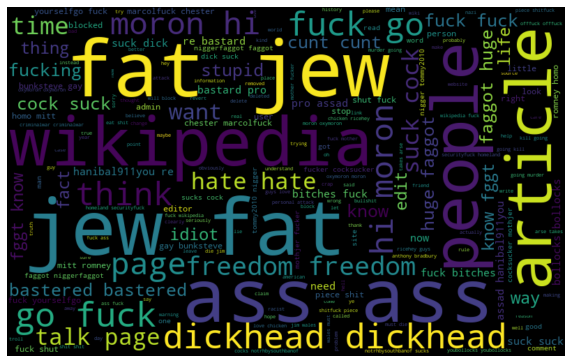

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(attacking_label) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 

plt.axis('off')
plt.savefig("attacking_wordcloud.pdf",dpi=300)
plt.show()

In [ ]:
misogyny_class = df_all[df_all["class"] == 1]
misogyny_label = ' '.join([text for text in misogyny_class['Text']]) 

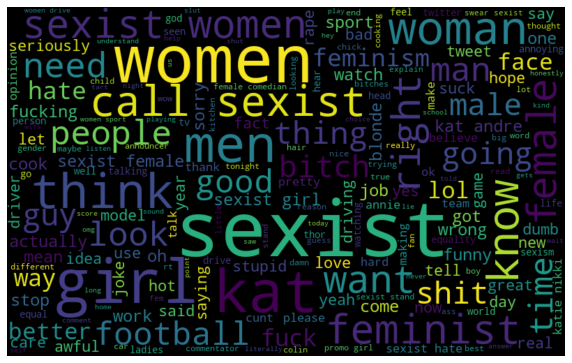

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(misogyny_label) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 

plt.axis('off')
plt.savefig("misogyny_wordcloud.pdf",dpi=300)
plt.show()

In [ ]:
neutral_class = df_all[df_all["class"] == 2]
neutral_label = ' '.join([text for text in neutral_class['Text']]) 

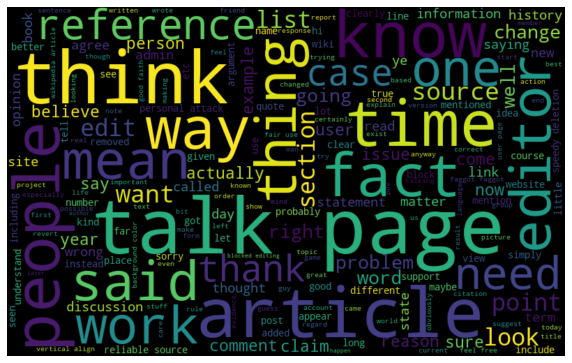

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_label) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 

plt.axis('off')
plt.savefig("neutral_wordcloud.pdf",dpi=300)
plt.show()

In [ ]:
offensive_class = df_all[df_all["class"] == 3]
offensive_label = ' '.join([text for text in offensive_class['Text']]) 

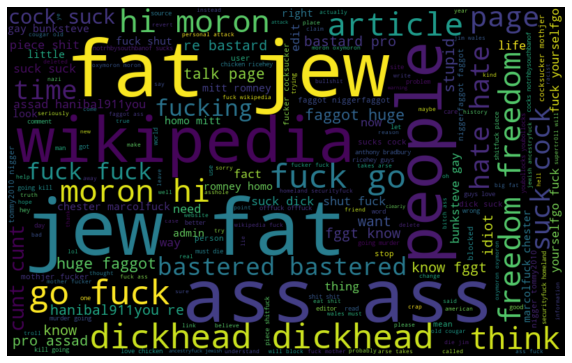

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(offensive_label) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 

plt.axis('off')
plt.savefig("offensive_wordcloud.pdf",dpi=300)
plt.show()

In [ ]:
racism_class = df_all[df_all["class"] == 4]
racism_label = ' '.join([text for text in racism_class['Text']]) 

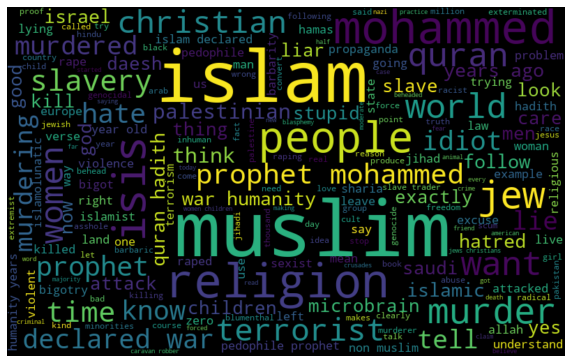

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(racism_label) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 

plt.axis('off')
plt.savefig("racism_wordcloud.pdf",dpi=300)
plt.show()

In [ ]:
##df_all.to_csv("inspect.csv")

##RNN_BILSTM

In [ ]:

    #                                                                                                                                                                                                                                                                                                                                                     You can give class_weights as a parameter to your model's fit method.

from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(data['outputCol']),
                                             data['outputCol']))

weights=dict()
for index, weight in enumerate(class_weights) :
  weights[index]=weight

history = model.fit(X_train, Y_train, 
                    class_weight=weights,
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


NameError: ignored

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 4.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=e398bd662996009c37db4fa93aa9855acd73e2d1da3116d63daa2a793f26e2c3
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [9]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 5.0 MB/s 
     |████████████████████████████████| 6.5 MB 57.9 MB/s 
     |████████████████████████████████| 596 kB 57.7 MB/s 
     |████████████████████████████████| 67 kB 6.0 MB/s 
     |████████████████████████████████| 895 kB 59.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [10]:
## for data
import json
import pandas as pd
import numpy as np## for plotting
import matplotlib.pyplot as plt
import seaborn as sns## for processing
import re
import nltk## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing## for explainer
#from lime import lime_text## for word embedding
import gensim
import gensim.downloader as gensim_api## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K## for bert language model
import transformers
from tensorflow.python.keras import regularizers

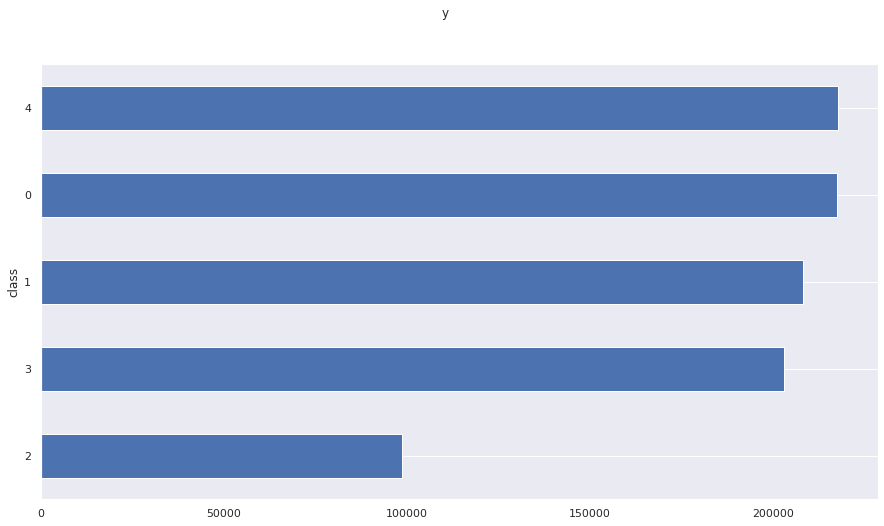

In [ ]:
fig, ax = plt.subplots()
fig.suptitle("y", fontsize=12)
df_all['class'].reset_index().groupby('class').count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [ ]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and   
    #characters and then strip)
    
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [ ]:
  import nltk
  nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
dtf["Text"] = dtf["text"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))dtf.head()

SyntaxError: ignored

In [ ]:
## split dataset
dtf_train, dtf_test = model_selection.train_test_split(df_all, test_size=0.3,random_state=42)
## get target
y_train = dtf_train["class"].values
y_test = dtf_test["class"].values

NameError: ignored

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(df_all, df_all["class"]):
    dtf_train = df_all.loc[train_index]
    dtf_test = df_all.loc[test_index]
#dtf_train, dtf_test = StratifiedShuffleSplit(df_all, test_size = 0.2, random_state = 42)
y_train = dtf_train["class"].values
y_test = dtf_test["class"].values

In [ ]:
#nlp = gensim_api.load("word2vec-google-news-300")

In [ ]:
corpus = dtf_train["tidy_tweet"]
## create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)
## detect bigrams and trigrams
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                 delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
            delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [ ]:
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=300,   
            window=8, min_count=1, sg=1, iter=30)

In [ ]:
word = "dick"
nlp[word].shape

In [ ]:
word = "israel"
fig = plt.figure()## word embedding
tot_words = [word] + [tupla[0] for tupla in 
                 nlp.most_similar(word, topn=20)]
X = nlp[tot_words]## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

In [ ]:
## tokenize text
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)## padding sequence
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=15, padding="post", truncating="post")

In [ ]:
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()
plt.savefig('W2V-heatmap',dpi=300); 

In [ ]:
i=0
## list of text: ["I like this", ...]
len_txt = len(dtf_train["tidy_tweet"].iloc[i].split())
print("from: ", dtf_train["tidy_tweet"].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf_train["tidy_tweet"].iloc[i].split()[0], 
      " -- idx in vocabulary -->", 
      dic_vocabulary[dtf_train["tidy_tweet"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

In [ ]:
corpus = dtf_test["tidy_tweet"]
## create list of n-grams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)
    ## detect common bigrams and trigrams using the fitted detectors
lst_corpus = list(bigrams_detector[lst_corpus])
lst_corpus = list(trigrams_detector[lst_corpus])
## text to sequence with the fitted tokenizer
lst_text2seq = tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=15,
             padding="post", truncating="post")

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

oversample = SMOTE(random_state=777)


#X_train,y_train=oversample.fit_resample(X_train,y_train)
#X_test,y_test=oversample.fit_resample(X_test,y_test)

In [ ]:
X_train,y_train=oversample.fit_resample(X_train,y_train)
X_test,y_test=oversample.fit_resample(X_test,y_test)

In [ ]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight( class_weight = "balanced",
classes =np.unique(y_train),y =y_train))



In [ ]:
class_weights = dict(zip(np.unique(y_train), class_weights))
#class_weights

In [ ]:
y_test.shape

In [ ]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, 300))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

In [ ]:
word = "data"
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, 
      "|vector")

In [ ]:
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="softmax")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x
## input
x_in = layers.Input(shape=(15,))## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=15, trainable=False)(x_in)## apply attention
x = attention_layer(x, neurons=15)## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=64, dropout=0.2, 
                         return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=32, dropout=0.2))(x)## final dense layers
x = layers.Dense(16, kernel_regularizer=regularizers.l2((0.001)),activation='relu')(x)
y_out = layers.Dense(5, activation='softmax')(x)## compile
model = models.Model(x_in, y_out)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

In [ ]:
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="softmax")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x
## input
x_in = layers.Input(shape=(15,))## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=15, trainable=False)(x_in)## apply attention
x = attention_layer(x, neurons=15)## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2, 
                         return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2))(x)## final dense layers
x = layers.Dense(32, activation='relu')(x)
y_out = layers.Dense(5, activation='softmax')(x)## compile
model2 = models.Model(x_in, y_out)
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model2.summary()



In [ ]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(data['outputCol']),
                                             data['outputCol']))

weights={}
for index, weight in enumerate(class_weights) :
  weights[index]=weight

In [ ]:
y_test.shape

In [ ]:
## encode y
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])## train
training = model2.fit(x=X_train, y=y_train, batch_size=256, 
                     epochs=10, shuffle=True, verbose=1, 
                     validation_split=0.3, class_weight=class_weights)## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.savefig('results',dpi=300)
plt.show()
#plt.savefig('results',dpi=300)

In [ ]:
## SMOTE
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])## train
training = model.fit(x=X_train, y=y_train, batch_size=256, 
                     epochs=10, shuffle=True, verbose=1, 
                     validation_split=0.3, class_weight=None)## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.savefig('results_smote',dpi=300)
plt.show()
#plt.savefig('results',dpi=300)

In [ ]:
predicted_prob = model2.predict(X_test)
predicted = [dic_y_mapping[np.argmax(pred)] for pred in 
             predicted_prob]

In [ ]:
predicted_prob4 = model2.predict(X_train)
predicted4 = [dic_y_mapping[np.argmax(pred)] for pred in 
             predicted_prob4]

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

evaluation = pd.DataFrame({'Model': [],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Precision(test)':[],
                           'Recal(test)':[],
                           'F1_score(test)':[]})

In [ ]:
precision_train=format(precision_score(y_train, predicted4, average='macro'),'.3f')
recall_train=format(recall_score(y_train, predicted4, average='macro'),'.3f')
f1_train=format(f1_score(y_train, predicted4, average='macro'),'.3f')


precision_test=format(precision_score(y_test,predicted, average='macro'),'.3f')
recall_test=format(recall_score(y_test, predicted, average='macro'),'.3f')
f1_test=format(f1_score(y_test, predicted, average='macro'),'.3f')
r = evaluation.shape[0]
evaluation.loc[r] = ['RNN-biLSTM_SMOTE',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation

In [ ]:
y_test= pd.Series(y_test, dtype='int') 

In [ ]:
pred = pd.Series(predicted, dtype='int') 

In [ ]:
ytest

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt 
ltrain=predicted
ltest=predicted1
skplt.metrics.plot_confusion_matrix(
    y_train, 
    ltrain,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Train data ',
    cmap='Blues'
    #normalize=True
    )
plt.savefig('RNN-train.pdf',dpi=300);
skplt.metrics.plot_confusion_matrix(
    y_test, 
    ltest,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Test data ',
    cmap='Blues'
    #normalize=True
   
    )
plt.savefig('RNN-test.pdf',dpi=300);

##GLOVE RNN-LSTM


In [3]:
df=pd.read_csv('/content/drive/MyDrive/323 final/Online dataset/try_online_no_offensive_data.csv')

In [4]:
df.Text=df.Text.astype(str)

In [5]:
df["class"].value_counts()

2    98456
0    51061
1     6356
3     3912
Name: class, dtype: int64

In [11]:
## split dataset
dtf_train, dtf_test = model_selection.train_test_split(df, test_size=0.3,random_state=42)
## get target
y_train = dtf_train["class"].values
y_test = dtf_test["class"].values

In [ ]:
#y_train.value_count()

In [12]:
max_features = 11000
maxlen = 200

In [13]:
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence

In [14]:
dtf_train.head()

,Unnamed: 0,index,Text,class,text,tokens,normalized_tweets,tidy_tweet
34824,34824,227599,harrass user steped private conversation reve...,0,en,"['harrass', 'user', 'steped', 'private', 'conv...","['harrass', 'user', 'stepe', 'privat', 'conver...",harrass user stepe privat conver revert bad la...
40943,40943,234473,revert edits fuckin userpage if want organs un...,0,en,"['revert', 'edits', 'fuckin', 'userpage', 'if'...","['revert', 'edit', 'fuckin', 'userpag', 'if', ...",revert edit fuckin userpag if want organ unnas...
155020,155020,985451,god course teliasonera owns it isp it indicat...,2,en,"['god', 'course', 'teliasonera', 'owns', 'it',...","['god', 'cours', 'teliasonera', 'own', 'it', '...",god cour teliasonera own it isp it indic ip share
153159,153159,983285,thanks what now hey again i flew world i wiki...,2,en,"['thanks', 'what', 'now', 'hey', 'again', 'i',...","['thank', 'what', 'now', 'hey', 'again', 'i', ...",thank what now hey again i flew world i wikipe...
90745,90745,909451,notability tim leverentz a tag placed tim lev...,2,en,"['notability', 'tim', 'leverentz', 'a', 'tag',...","['notabl', 'tim', 'leverentz', 'a', 'tag', 'pl...",notabl tim leverentz a tag place tim leverentz...


In [ ]:
#.SentimentText=p_test.SentimentText.astype(str)

In [15]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(dtf_train['Text'])
tokenized_train = tokenizer.texts_to_sequences(dtf_train['Text'])
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [16]:
tokenized_test = tokenizer.texts_to_sequences(dtf_test['Text'])
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

#EMBEDDING_FILE = '../input/glove-twitter/glove.twitter.27B.200d.txt'



In [17]:
#!mkdir data/glove
!mkdir glove_twitter

#/content/glove.twitter.27B.zip

!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip
#!wget http://nlp.stanford.edu/data/glove.6B.zip

!unzip glove.twitter.27B.zip -d glove_twitter
#!unzip glove.6B.zip -d data/glove

--2022-03-01 15:14:17--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2022-03-01 15:14:17--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2022-03-01 15:14:17--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [appli

In [18]:
EMBEDDING_FILE = '/content/glove_twitter/glove.twitter.27B.200d.txt'

In [19]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [20]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
#Defining Neural Network
model3 = Sequential()
#Non-trainable embeddidng layer
model3.add(Embedding(nb_words, output_dim=embed_size, weights=[embedding_matrix], input_length=200, trainable=False))
#LSTM 
model3.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
model3.add(Dense(4, activation='softmax'))
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          2200000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              336896    
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 1028      
                                                                 
Total params: 2,537,924
Trainable params: 337,924
Non-trainable params: 2,200,000
_________________________________________________________________


In [ ]:
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=68112b3c96135f6b4c121c15230ce88edd51d680f63d65c9adbaf6dc02aec181
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


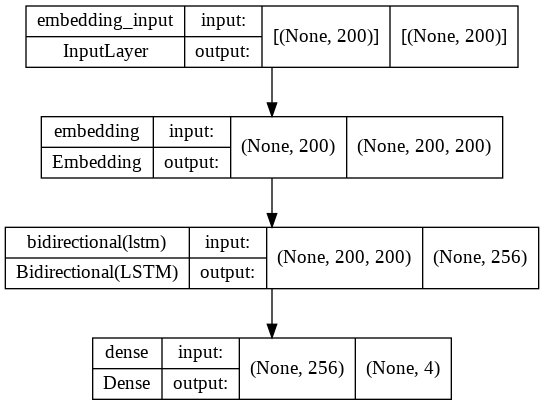

In [22]:
from keras.utils.vis_utils import plot_model
plot_model(model3, show_shapes=True)

In [23]:
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [24]:
checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')

Epoch 1/10
437/437 [==============================] - ETA: 0s - loss: 0.4184 - accuracy: 0.8409
Epoch 1: val_accuracy improved from -inf to 0.88184, saving model to model-001-0.881842.h5
437/437 [==============================] - 2172s 5s/step - loss: 0.4184 - accuracy: 0.8409 - val_loss: 0.3134 - val_accuracy: 0.8818
Epoch 2/10
437/437 [==============================] - ETA: 0s - loss: 0.3260 - accuracy: 0.8755
Epoch 2: val_accuracy improved from 0.88184 to 0.89110, saving model to model-002-0.891105.h5
437/437 [==============================] - 2182s 5s/step - loss: 0.3260 - accuracy: 0.8755 - val_loss: 0.2937 - val_accuracy: 0.8911
Epoch 3/10
437/437 [==============================] - ETA: 0s - loss: 0.3036 - accuracy: 0.8857
Epoch 3: val_accuracy improved from 0.89110 to 0.89423, saving model to model-003-0.894234.h5
437/437 [==============================] - 2183s 5s/step - loss: 0.3036 - accuracy: 0.8857 - val_loss: 0.2796 - val_accuracy: 0.8942
Epoch 4/10
437/437 [==============

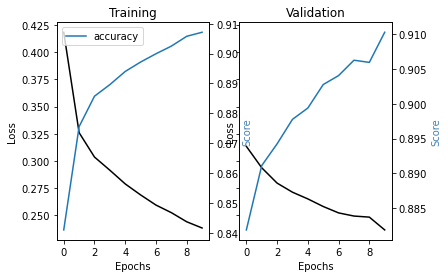

<Figure size 432x288 with 0 Axes>

In [25]:
## Glove
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])## train
training = model3.fit(x=x_train, y=y_train, batch_size=256, 
                     epochs=10, shuffle=True, verbose=1, 
                      validation_data = (X_test,y_test),callbacks=[checkpoint])## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()
plt.savefig('results2',dpi=300)

In [26]:
print("Accuracy of the model on Testing Data is - " , model3.evaluate(X_test,y_test)[1]*100)

1498/1498 [==============================] - 238s 159ms/step - loss: 0.2366 - accuracy: 0.9103
Accuracy of the model on Testing Data is -  91.02970361709595


In [28]:
pred = model3.predict_classes(X_test)
pred[:5]

AttributeError: ignored

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88     15164
           1       0.92      0.73      0.81      1891
           2       0.92      0.95      0.93     29691
           3       0.90      0.87      0.89      1190

    accuracy                           0.91     47936
   macro avg       0.91      0.85      0.88     47936
weighted avg       0.91      0.91      0.91     47936



In [29]:
pred_train = model3.predict_classes(x_train)


AttributeError: ignored

In [30]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt 
ltrain=predicted
ltest=predicted1
skplt.metrics.plot_confusion_matrix(
    y_train, 
    ltrain,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Train data ',
    cmap='Blues'
    #normalize=True
    )
plt.savefig('RNN-train.pdf',dpi=300);
skplt.metrics.plot_confusion_matrix(
    y_test, 
    ltest,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Test data ',
    cmap='Blues'
    #normalize=True
   
    )
plt.savefig('RNN-test.pdf',dpi=300);

NameError: ignored

In [31]:
predicted_prob = model3.predict(X_test)
predicted = [dic_y_mapping[np.argmax(pred)] for pred in 
             predicted_prob]

In [32]:
predicted_prob4 = model3.predict(x_train)
predicted4 = [dic_y_mapping[np.argmax(pred)] for pred in 
             predicted_prob4]

In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

evaluation = pd.DataFrame({'Model': [],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Precision(test)':[],
                           'Recal(test)':[],
                           'F1_score(test)':[]})

In [34]:
precision_train=format(precision_score(y_train, predicted4, average='macro'),'.3f')
recall_train=format(recall_score(y_train, predicted4, average='macro'),'.3f')
f1_train=format(f1_score(y_train, predicted4, average='macro'),'.3f')


precision_test=format(precision_score(y_test,predicted, average='macro'),'.3f')
recall_test=format(recall_score(y_test, predicted, average='macro'),'.3f')
f1_test=format(f1_score(y_test, predicted, average='macro'),'.3f')
r = evaluation.shape[0]
evaluation.loc[r] = ['RNN-biLSTM_Glove',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,RNN-biLSTM_Glove,0.927,0.879,0.901,0.908,0.852,0.877


In [35]:
y_test= pd.Series(y_test, dtype='int') 

In [36]:
pred = pd.Series(predicted, dtype='int') 

In [37]:
y_train.value_count()

AttributeError: ignored

In [ ]:
!pip install scikit-plot

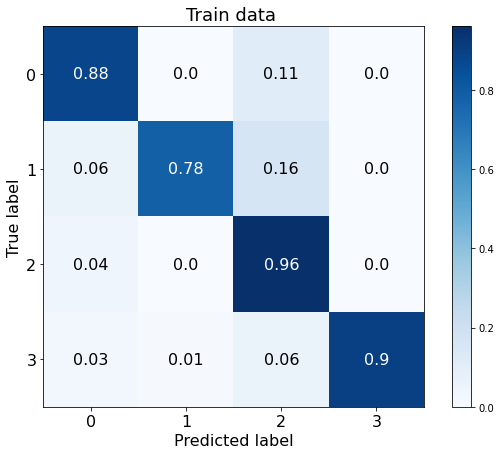

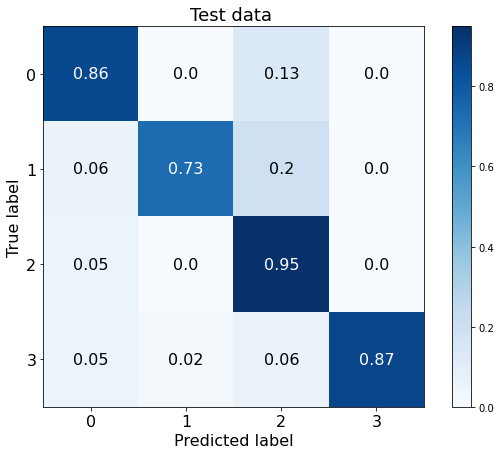

In [38]:
import scikitplot as skplt 
ltrain=predicted4
ltest=predicted
skplt.metrics.plot_confusion_matrix(
    y_train, 
    ltrain,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Train data ',
    cmap='Blues',
    normalize=True
    )
plt.savefig('RNN-train_Glove.pdf',dpi=300);
skplt.metrics.plot_confusion_matrix(
    y_test, 
    ltest,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Test data ',
    cmap='Blues',
    normalize=True
   
    )
plt.savefig('RNN-test_glove.pdf',dpi=300);

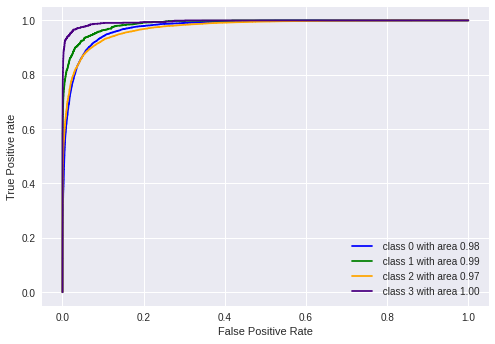

In [40]:
pred_lreg=predicted_prob
# roc curve for classes
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
plt.style.use('seaborn')

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 4
y=[0,1,2,3]
color=['blue','green','orange','indigo']
labels=y
#format(a, '.2f') 

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_lreg[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='-',color=color[i], label=' class '+str(labels[i])+' with area '+str(format(roc_auc[i],'.2f')))
    #le.inverse_transform(i)
# plotting    
rcParams['figure.figsize'] = 31.7,47
#plt.title('ROC CURVE FOR RNN_BILSTM MODEL')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('RNN_biLSTM_glove.pdf',dpi=300); 